#  Week 4. Case 2
Kimmo Eemil Juhani Tolonen<br>
Last edited: 25.2.2018<br>
Cognitive Systems for Health Technology Applications<br>
Helsinki Metropolia University of Applied Sciences

## 1. Objectives
The aim of this Case 2 is to learn use convolutional neural networks to classify medical images. I downloaded datafile full of diabetic retinopathy images, thousands and thousands of images. Three different folders for training, testing and validation. Two different types of images nonsymptons and symptons. First I import all libraries that I need, then I built neural network and process data and so on. All that found below from this notebook file.

### Note (25.2)
Okay now I take little risk here, I'm not happy with the last result that I get from training last time, result was only 0,73. I did little changes and now I run all, one more time. It is 6:32pm right now and deadline is under 3 hours from now. So let see what happens and how much time this takes. - Kimmo

## 2. Import libraries

In [30]:
# Code, model and history filenames
my_code = 'gpu_template.py'
model_filename = 'case_2_model.h5'
history_filename = 'case_2_history.p'

In [31]:
# Info for the operator
import time
print('----------------------------------------------------------------------')
print(' ')
print('Starting the code (', time.asctime(), '):', my_code)
print(' ')

----------------------------------------------------------------------
 
Starting the code ( Sun Feb 25 18:38:14 2018 ): gpu_template.py
 


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers
from keras import models
import pickle
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
import os

%matplotlib inline

## 3. Building network

This chapter is the place where building model happens. I determined batch sizes and number of epoches allready here for data processing, which is later in this code. Adding layers happens here too. I tried VGG16 here, but that gave only 0,70 accuracy for testing the data, so I decided drop that out.

In [33]:
# Training parameters
batch_size = 40
epochs = 20
steps_per_epoch = 20 
validation_steps = 20
image_height = 150
image_width = 150

In [34]:
# Build the model
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation = 'relu', 
                        input_shape = (image_height, image_width, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(138, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 18496)             0         
__________

In [35]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

## 4. Data preprocessing

In [36]:
# Dataset directories and labels files
train_dir = "..\\..\\dataset2\\train"
validation_dir = "..\\..\\dataset2\\validation"
test_dir = "..\\..\\dataset2\\test" 

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 1237 images belonging to 2 classes.
Found 413 images belonging to 2 classes.


In [37]:
# Create datagenerators for training, validation and testing

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [38]:
# shapes

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [39]:
# Generator for validation dataset
print('Validation dataset.')
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size = (image_height, image_width),
        batch_size = batch_size,
        class_mode = 'binary')

Validation dataset.
Found 413 images belonging to 2 classes.


In [40]:
labels_batch

array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,
        1.,  0.,  0.,  1.,  1.,  0.,  0.], dtype=float32)

## 5. Modeling

In [41]:
# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['acc'])

In [42]:
# This makes file to my folder from next training
model.save('case_2_run_1.h5')

In [43]:
# Model training and show time, how much time it takes...and some times it takes a lot...
t1 = time.time()
h = model.fit_generator(
      train_generator,
      steps_per_epoch = steps_per_epoch,
      verbose = 1,
      epochs = epochs,
      validation_data = validation_generator,
      validation_steps = validation_steps)
t2 = time.time()

Epoch 1/20
20/20 [==============================] - 387s 19s/step - loss: 0.7932 - acc: 0.6425 - val_loss: 0.6547 - val_acc: 0.7516
Epoch 2/20
20/20 [==============================] - 267s 13s/step - loss: 0.5754 - acc: 0.7366 - val_loss: 0.5588 - val_acc: 0.7257
Epoch 3/20
20/20 [==============================] - 324s 16s/step - loss: 0.5442 - acc: 0.7275 - val_loss: 0.5229 - val_acc: 0.7413
Epoch 4/20
20/20 [==============================] - 351s 18s/step - loss: 0.4810 - acc: 0.7625 - val_loss: 0.4866 - val_acc: 0.7542
Epoch 5/20
20/20 [==============================] - 316s 16s/step - loss: 0.5177 - acc: 0.7332 - val_loss: 0.5141 - val_acc: 0.7361
Epoch 6/20
20/20 [==============================] - 303s 15s/step - loss: 0.4571 - acc: 0.7575 - val_loss: 0.4568 - val_acc: 0.7840
Epoch 7/20
20/20 [==============================] - 361s 18s/step - loss: 0.5051 - acc: 0.7250 - val_loss: 0.4779 - val_acc: 0.7684
Epoch 8/20
20/20 [==============================] - 279s 14s/step - loss: 0.

In [44]:
# Store the elapsed time into history
h.history.update({'time_elapsed': t2 - t1})
print(' ')
print('Total elapsed time for training: {:.3f} minutes'.format((t2-t1)/60))
print(' ')

 
Total elapsed time for training: 104.411 minutes
 


In [45]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps = 21)

# Test accuracy
print('test_acc:', test_acc)

Found 413 images belonging to 2 classes.
test_acc: 0.791767552459


## 6. Results

I trained that model many times and I did not get over 0,80 overall. I switch number of epoches, batch sizes, size of pictures, layer sizes and many other things. Some times training took over hour in my laptop. One time even my laptop crashed from overheating, maybe from that or from something else, but right after training completed I put laptop aside from table and it crashed. I trained these results at sunday evening and I decided to leave it here. I did little additions to results when I went trought some powerpoints from Oma, copied them and added them this notebook. Compiled explanations can be found below at "Conclusions" section.

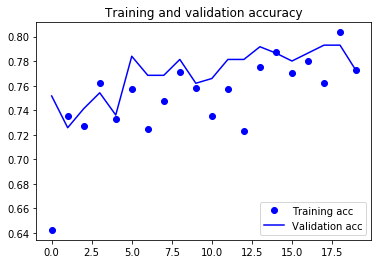

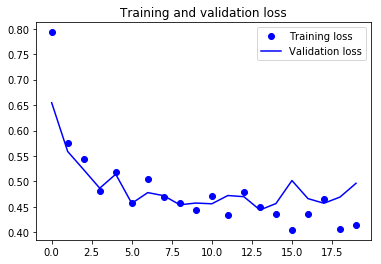

In [46]:
import matplotlib.pyplot as plt

acc = h.history['acc']
val_acc = h.history['val_acc']
loss = h.history['loss']
val_loss = h.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [47]:
# Predict the Score

y_true = np.zeros(413)
y_score = np.zeros(413)
sample_count = 413
i = 0
for inputs_batch, labels_batch in test_generator:
    predicts_batch = model.predict(inputs_batch)
    L = labels_batch.shape[0]
    index = range(i, i + L)
    y_true[index] = labels_batch.ravel()
    y_score[index] = predicts_batch.ravel()
    i = i + L
    if i >= sample_count:
        break
    

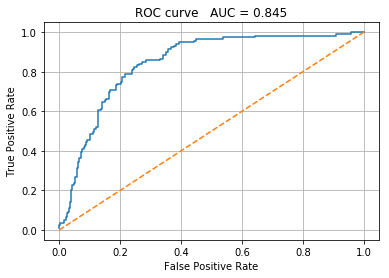

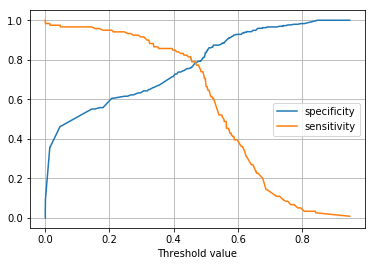

In [48]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_true, y_score)
auc = roc_auc_score(y_true, y_score)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve   AUC = {:.3f}'.format(auc))
plt.show()

plt.figure()
plt.plot(thresholds, 1-fpr, label = 'specificity')
plt.plot(thresholds, tpr, label = 'sensitivity')
plt.legend()
plt.grid()
plt.xlabel('Threshold value')
plt.show()

In [49]:
# Import more libraries from sklearn.
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [50]:
# Select the threshold to maximize both specificity and sensitivity
th = 0.3

In [51]:
acc = accuracy_score(y_true, y_score > th)
prec = precision_score(y_true, y_score > th)
f1 = f1_score(y_true, y_score > th)
recall = recall_score(y_true, y_score > th)

print('Accuracy:  {:.3f}'.format(acc))
print('Precision: {:.3f}'.format(prec))
print('Recall:    {:.3f}'.format(recall))
print('F1:        {:.3f}'.format(f1))

Accuracy:  0.717
Precision: 0.505
Recall:    0.916
F1:        0.651


In [52]:
print('Classification report')
print(classification_report(y_true, y_score > th, labels = [1.0, 0.0], target_names = ['Disease', 'Healthy']))

Classification report
             precision    recall  f1-score   support

    Disease       0.50      0.92      0.65       119
    Healthy       0.95      0.64      0.76       294

avg / total       0.82      0.72      0.73       413



In [53]:
tn, fp, fn, tp = confusion_matrix(y_true, y_score > th).ravel()

print('                      Confusion matrix')
print('                       True condition')
print('                      Positive Negative      Sum')
print('Predicted | Positive  {:8} {:8} {:8}'.format(tp, fp, tp + fp))
print('condition | Negative  {:8} {:8} {:8}'.format(fn, tn, fn + tn))
print('                 Sum  {:8} {:8} {:8}'.format(tp + fn, fp + tn, tp + fp + fn + tn))
print(' ')
print('Sensitivity: {:.3f}'.format(tp/(tp+fn)))
print('Specificity: {:.3f}'.format(tn/(tn+fp)))

                      Confusion matrix
                       True condition
                      Positive Negative      Sum
Predicted | Positive       109      107      216
condition | Negative        10      187      197
                 Sum       119      294      413
 
Sensitivity: 0.916
Specificity: 0.636


## 7. Conclusions

Lots of copied code and lots of training hours behind. Majority of this code is taken from example materials, but I tried to do some changes little bit. I changed Batch sizes and numbers of epochs many times and trained model over and over. I changed layer numbers and tried VGG16, but that gave only 0,70 accuracy. I changed target sizes too to 200, but I changed that back to 150. I tried many things, but not get very good results from testing. Sometimes I don't even know what I do, I change some numbers on added layers and train model again. At last evening I added predictions and confusion matrix, too late for more studying them. <br>
<br>
Classification report takes 413 samples and classified them, 119 diseased and 294 healthy. Test accuracy is 0.79, looks pretty good to me, but not over 0.80, which was ideal target.
<br>
<br>
Okay last training completed about one hour before this cases deadline time, to my eyes result looks better than earlier results. My winter holiday (some people call that project week) activities (lots of skiing and watching olympic games) took time away from these school assigments. Majority of this work happened when I came back home from South-Savo on the weekend. Then my mind was still in olympic games and especially in cross-country skiing, that was epic. Lesson from this is, never left work at holiday week.
<br>
<br>
Maybe I learned more from these cognitive systems, but I have still lot of work to do. Now I'm rested, energized and now it's time for the work. This Case is what it is and now I target my mind to Case 3 and exam. <br>
<br>
-Kimmo